In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Load the CSV file
df = pd.read_csv('traffic_flow_data.csv', header=None)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [64]:
df.head(10)


,0,1
0,1.727123e+09,"[0.05091078935077067, 0.04624007473143391, 0.0..."
1,1.727123e+09,"[0.04764128911723494, 0.04950957496496964, 0.0..."
2,1.727123e+09,"[0.044838860345632885, 0.052312003736571695, 0..."
3,1.727123e+09,"[0.059785147127510506, 0.046707146193367584, 0..."
4,1.727123e+09,"[0.06258757589911257, 0.05744978981784213, 0.0..."
5,1.727123e+09,"[0.0639887902849136, 0.05558150397010743, 0.06..."
6,1.727123e+09,"[0.08827650630546474, 0.07753386268099019, 0.0..."
7,1.727123e+09,"[0.11349836524988323, 0.09434843531060252, 0.0..."
8,1.727123e+09,"[0.12283979448855675, 0.09715086408220458, 0.0..."
9,1.727123e+09,"[0.12517515179822514, 0.10742643624474545, 0.0..."


In [66]:

df.columns 

Index([0, 1], dtype='int64')

In [67]:
# Rename columns for clarity
df.columns = ['timestamp', 'traffic_data']

In [68]:
df.timestamp

0       1.727123e+09
1       1.727123e+09
2       1.727123e+09
3       1.727123e+09
4       1.727123e+09
            ...     
1295    1.727126e+09
1296    1.727126e+09
1297    1.727126e+09
1298    1.727126e+09
1299    1.727126e+09
Name: timestamp, Length: 1300, dtype: float64

In [69]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [70]:
df.timestamp

0      2024-09-23 20:28:48.774060011
1      2024-09-23 20:28:50.260905027
2      2024-09-23 20:28:51.266688107
3      2024-09-23 20:28:52.273241043
4      2024-09-23 20:28:53.278388023
                    ...             
1295   2024-09-23 21:10:56.515404940
1296   2024-09-23 21:10:57.522128104
1297   2024-09-23 21:10:58.524385929
1298   2024-09-23 21:10:59.531989098
1299   2024-09-23 21:11:00.537409067
Name: timestamp, Length: 1300, dtype: datetime64[ns]

In [71]:
# Check the actual start date
actual_start_date = df['timestamp'].min()
print(f" Actual start date - {actual_start_date}")

 Actual start date - 2024-09-23 20:28:48.774060011


In [72]:
# Convert string representation of list to actual list
df['traffic_data'] = df['traffic_data'].apply(ast.literal_eval)

In [73]:
# Create separate columns for each node
num_nodes = len(df['traffic_data'].iloc[0])
for i in range(num_nodes):
    df[f'node_{i}'] = df['traffic_data'].apply(lambda x: x[i])

In [74]:
num_nodes


36

In [75]:
# Set timestamp as index
df.set_index('timestamp', inplace=True)

In [76]:
# Drop the original traffic_data column
df = df.drop('traffic_data', axis=1)

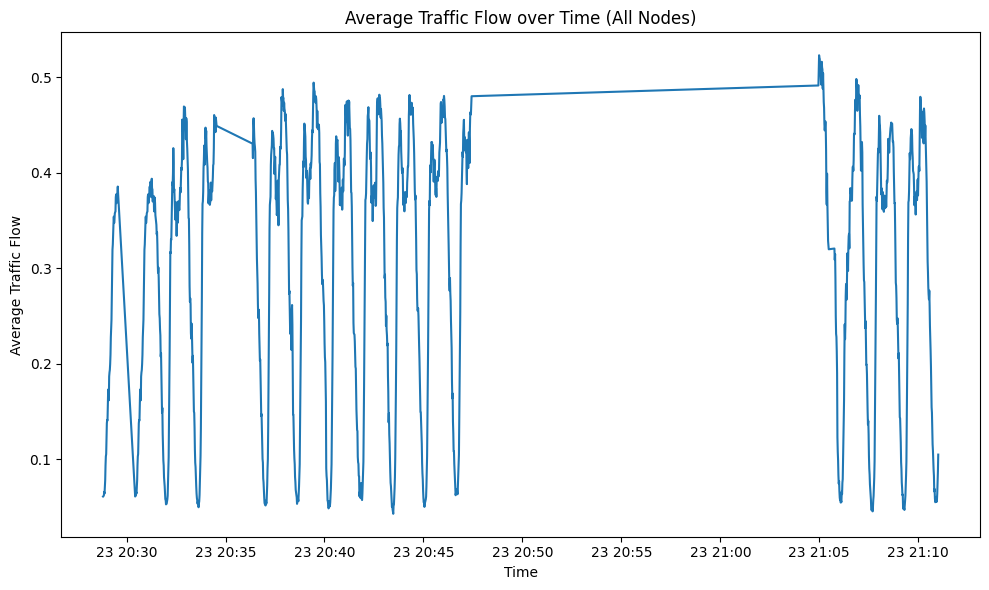

In [77]:
# Plot average traffic flow

# Calculate the average traffic flow across all nodes
df['average'] = df.mean(axis=1)

# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Plot the average traffic flow over time
plt.plot(df.index, df['average'])

# Set the title of the plot
plt.title('Average Traffic Flow over Time (All Nodes)')

# Label the x-axis
plt.xlabel('Time')

# Label the y-axis
plt.ylabel('Average Traffic Flow')
plt.tight_layout()

# Display the plot
plt.show()

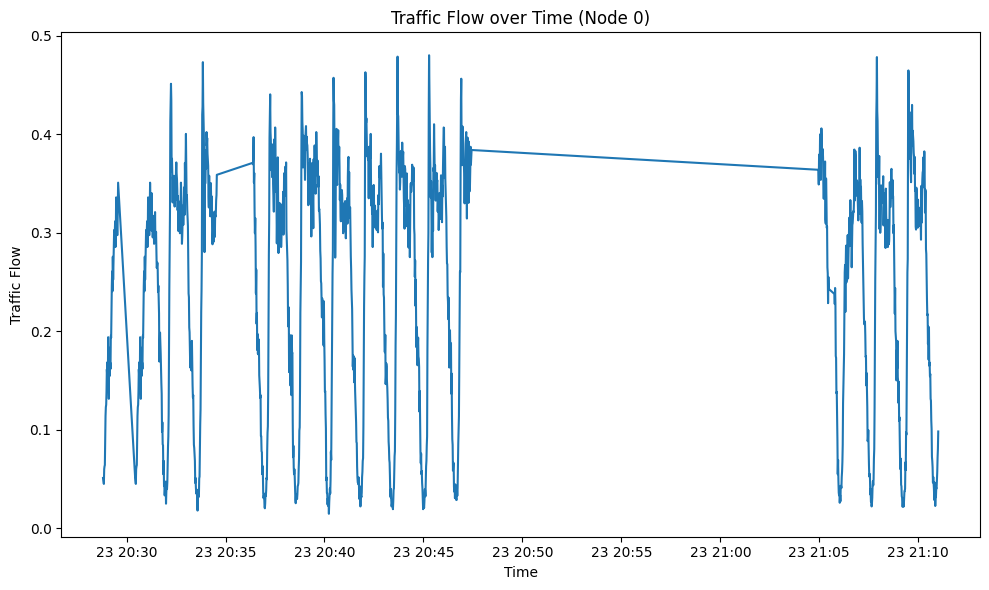

In [78]:
# Plot traffic flow for the first node
plt.figure(figsize=(10, 6))

# Plot the traffic flow for Node 0 over time
# df.index is assumed to be the timestamp, df['node_0'] is the traffic flow data for Node 0
plt.plot(df.index, df['node_0'])

# Set the title of the plot
plt.title('Traffic Flow over Time (Node 0)')

# Label the x-axis
plt.xlabel('Time')

# Label the y-axis
plt.ylabel('Traffic Flow')
plt.tight_layout()

# Display the plot
plt.show()

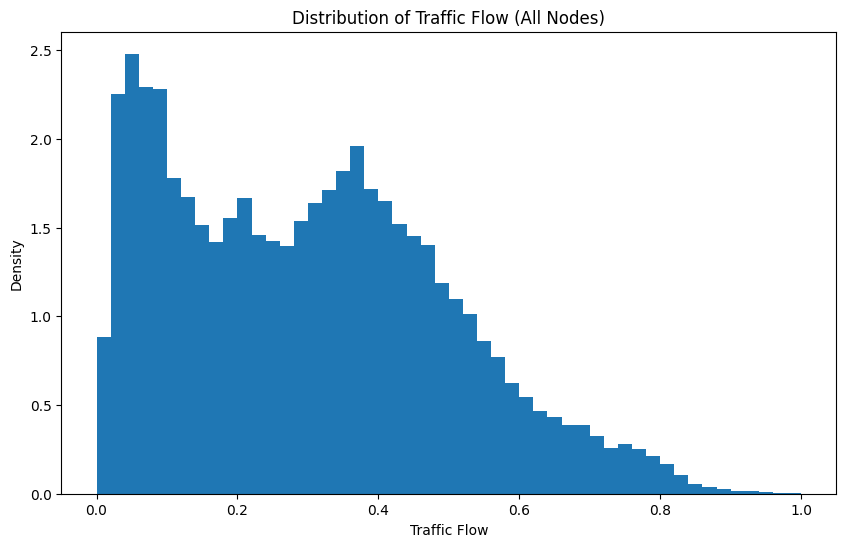

In [79]:
# Distribution of traffic flow

# Create a histogram of traffic flow values
# df.values.flatten() converts the DataFrame to a 1D array
# bins=50 specifies the number of bins in the histogram
# density=True normalizes the histogram to show density instead of counts

plt.figure(figsize=(10, 6))
plt.hist(df.values.flatten(), bins=50, density=True)
plt.title('Distribution of Traffic Flow (All Nodes)')
plt.xlabel('Traffic Flow')
plt.ylabel('Density')
plt.show()

In [80]:
# Calculate and print basic statistics
print(df.describe())

            node_0       node_1       node_2       node_3       node_4  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000   
mean      0.246074     0.329059     0.213119     0.245366     0.329814   
std       0.125248     0.188357     0.102676     0.120933     0.183366   
min       0.014479     0.012144     0.017749     0.021485     0.022887   
25%       0.139187     0.173984     0.136035     0.144909     0.149813   
50%       0.297758     0.383699     0.234236     0.276039     0.361980   
75%       0.346100     0.465320     0.288183     0.338627     0.478048   
max       0.480149     0.759925     0.460065     0.485754     0.719757   

            node_5       node_6       node_7       node_8       node_9  ...  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000  ...   
mean      0.312604     0.355126     0.263004     0.366801     0.437248  ...   
std       0.172572     0.198686     0.140583     0.174730     0.212444  ...   
min       0.02428

In [81]:
# Save the processed DataFrame
df.to_csv('after_eda_traffic_flow_data.csv')

In [82]:
# Daily pattern
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['average'].mean()

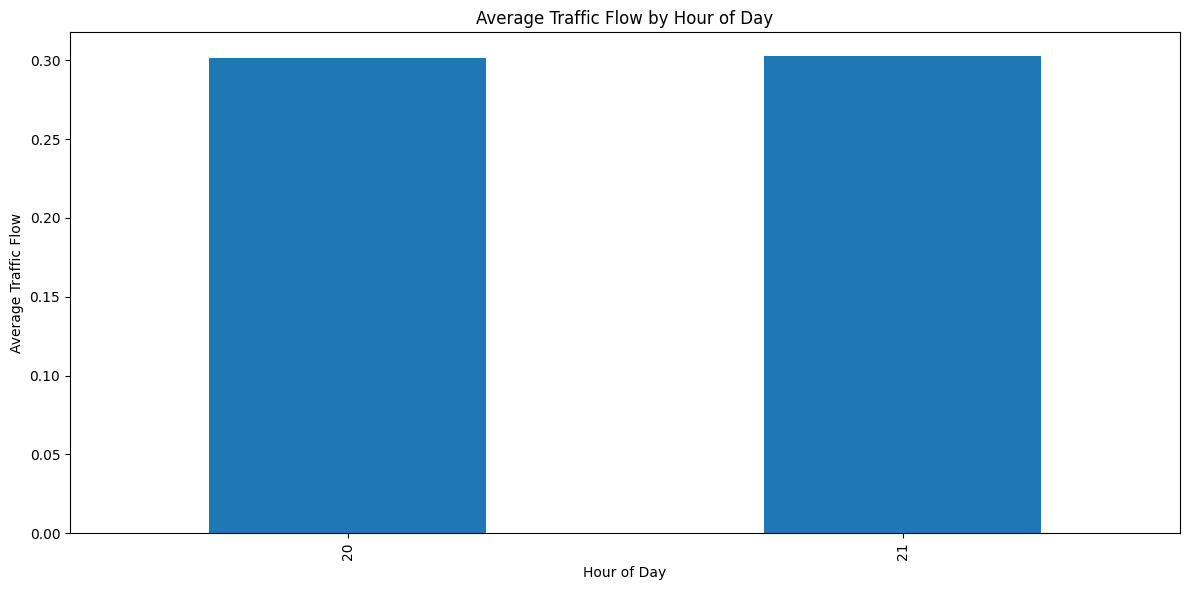

In [83]:
# Plot a bar chart of hourly average traffic flow
# Assuming 'hourly_avg' is a Series or DataFrame with hours as index and average traffic flow as values

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar')

plt.title('Average Traffic Flow by Hour of Day')

plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Flow')

plt.tight_layout()
plt.show()

In [84]:
df['day_of_week'] = df.index.dayofweek
daily_avg = df.groupby('day_of_week')['average'].mean()

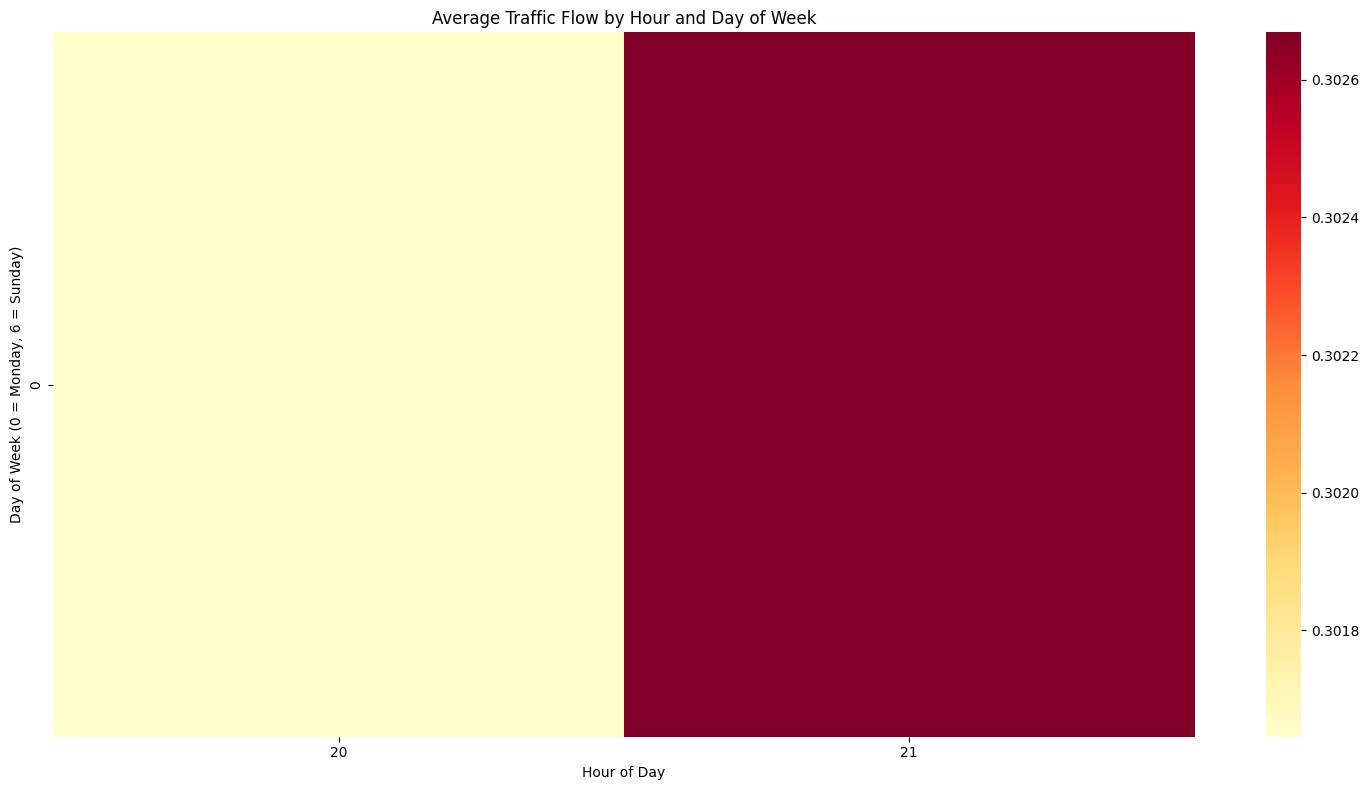

In [85]:
# Heatmap of average traffic flow by hour and day of week

# Create a pivot table of average traffic flow
# 'day_of_week' as rows, 'hour' as columns, and 'average' as values

pivot_df = df.pivot_table(values='average', index='day_of_week', columns='hour', aggfunc='mean')
plt.figure(figsize=(15, 8))

# Create a heatmap using seaborn
# pivot_df is the data to be plotted
# cmap='YlOrRd' specifies a yellow-orange-red color scheme

sns.heatmap(pivot_df, cmap='YlOrRd')
plt.title('Average Traffic Flow by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.tight_layout()
plt.show()

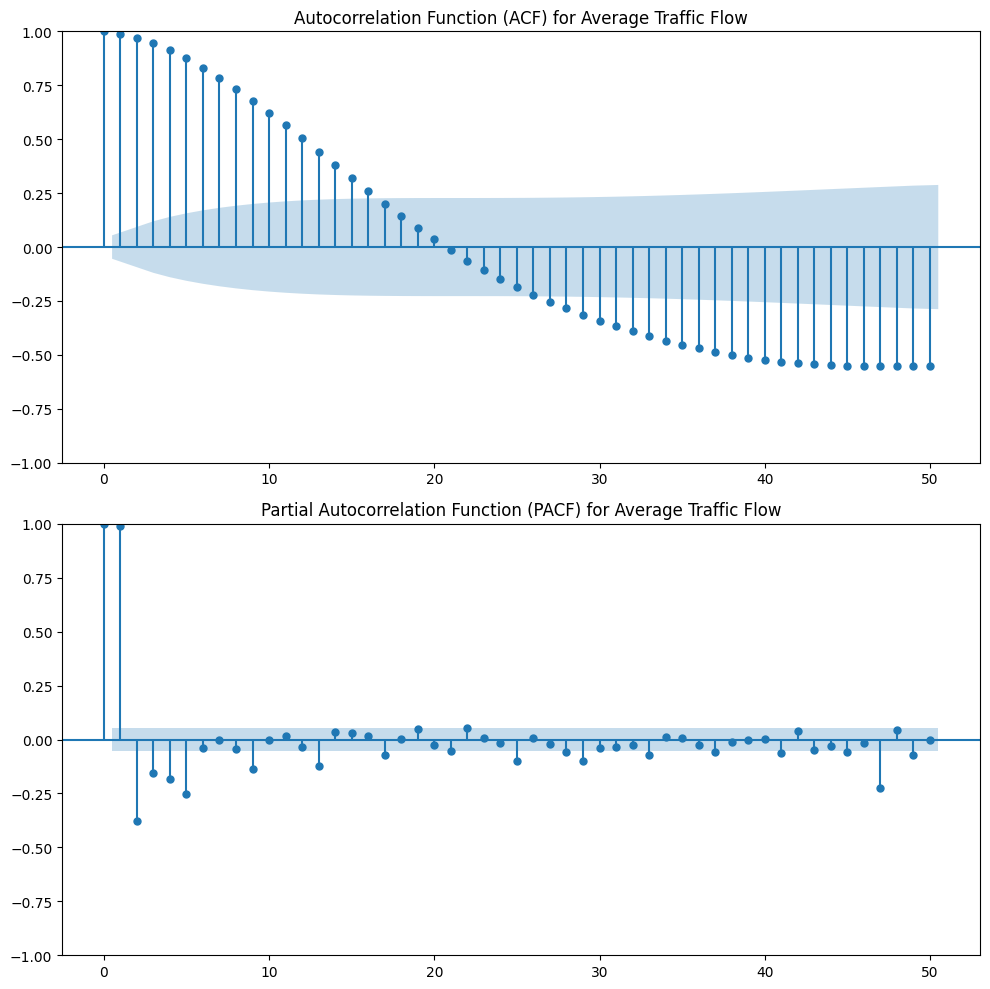

In [86]:
#Autocorrelation and Partial Autocorrelation Plots 
#Generate and interpret ACF and PACF plots to identify patterns, seasonality, and trends in the traffic flow data.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for average traffic flow

# Two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the Autocorrelation Function (ACF) on the first subplot
plot_acf(df['average'], ax=ax1, lags=50)

# Set the title for the ACF plot
ax1.set_title('Autocorrelation Function (ACF) for Average Traffic Flow')

# Partial Autocorrelation Function (PACF) on the second subplot
plot_pacf(df['average'], ax=ax2, lags=50)

# Set the title for the PACF plot
ax2.set_title('Partial Autocorrelation Function (PACF) for Average Traffic Flow')
plt.tight_layout()

# Display the plots
plt.show()

In [87]:
# Check if Speed is present in columns

if 'speed' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['speed'])
    plt.title('Speed vs Time')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.tight_layout()
    plt.show()
else:
    print("Speed data is not available in the dataset.")

Speed data is not available in the dataset.


In [88]:
# Check if Occupancy is present in columns

if 'occupancy' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['occupancy'])
    plt.title('Occupancy vs Time')
    plt.xlabel('Time')
    plt.ylabel('Occupancy')
    plt.tight_layout()
    plt.show()
else:
    print("Occupancy data is not available in the dataset.")

Occupancy data is not available in the dataset.


In [91]:
print("visualization done!!!")

visualization done!!!
